In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# df = pd.read_json('News_Category_Dataset_v3.json',lines= True)
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)[['headline', 'category']]


In [4]:
df.shape

(209527, 2)

In [5]:
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [6]:
selected_category = ['COMEDY','SPORTS','DIVORCE','CRIME']

In [7]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [8]:
df_new = df[df['category'].isin(selected_category)]

In [9]:
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [10]:
df_new['category'].value_counts()

category
COMEDY     5400
SPORTS     5077
CRIME      3562
DIVORCE    3426
Name: count, dtype: int64

In [11]:
min_samples = 3426 # Divorce


df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=42)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=42)
df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=42)
df_science = df_new[df_new.category=="DIVORCE"].sample(min_samples, random_state=42)

In [12]:
df_new['category'].value_counts()

category
COMEDY     5400
SPORTS     5077
CRIME      3562
DIVORCE    3426
Name: count, dtype: int64

In [13]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

category
COMEDY     3426
SPORTS     3426
CRIME      3426
DIVORCE    3426
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_balanced['label'] = le.fit_transform(df_balanced['category'])

In [15]:
df_balanced.head()

,headline,category,label
66222,Bill Maher And Bernie Sanders Take Down 'Chick...,COMEDY,0
27108,John Oliver Nails The One Thing Donald Trump C...,COMEDY,0
92489,We'd Like To Get Our Hands On These Stephen Co...,COMEDY,0
61423,HE'S BACK! Jon Stewart Returns With A Message ...,COMEDY,0
53645,James Corden Rips Donald Trump For Turning The...,COMEDY,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['headline'], 
    df_balanced['label'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=42,
    stratify=df_balanced['label']
)

In [17]:
y_train.value_counts()

label
1    2741
3    2741
0    2741
2    2740
Name: count, dtype: int64

In [18]:
y_test.value_counts()

label
2    686
1    685
0    685
3    685
Name: count, dtype: int64

# Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [19]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       685
           1       0.92      0.90      0.91       685
           2       0.84      0.92      0.88       686
           3       0.91      0.84      0.87       685

    accuracy                           0.87      2741
   macro avg       0.88      0.87      0.87      2741
weighted avg       0.88      0.87      0.87      2741



# Attempt 2 : Use 1-gram and bigrams

In [20]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       685
           1       0.92      0.90      0.91       685
           2       0.85      0.93      0.89       686
           3       0.91      0.84      0.88       685

    accuracy                           0.88      2741
   macro avg       0.88      0.88      0.88      2741
weighted avg       0.88      0.88      0.88      2741



# Attempt 3 : Use 1-gram to trigrams

In [21]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       685
           1       0.92      0.90      0.91       685
           2       0.85      0.92      0.89       686
           3       0.91      0.84      0.88       685

    accuracy                           0.88      2741
   macro avg       0.88      0.88      0.88      2741
weighted avg       0.88      0.88      0.88      2741



## Use text pre-processing to remove stop words, punctuations and apply lemmatization


In [22]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [23]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess) 

In [24]:
df_balanced.head()

,headline,category,label,preprocessed_txt
66222,Bill Maher And Bernie Sanders Take Down 'Chick...,COMEDY,0,Bill Maher Bernie Sanders Chicken Donald Trump
27108,John Oliver Nails The One Thing Donald Trump C...,COMEDY,0,John Oliver Nails Thing Donald Trump figure Wh...
92489,We'd Like To Get Our Hands On These Stephen Co...,COMEDY,0,like hand Stephen Colbert Col bear
61423,HE'S BACK! Jon Stewart Returns With A Message ...,COMEDY,0,Jon Stewart Returns message Fox News GOP conse...
53645,James Corden Rips Donald Trump For Turning The...,COMEDY,0,James Corden Rips Donald Trump turn Election p...


In [25]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       685
           1       0.92      0.90      0.91       685
           2       0.84      0.92      0.88       686
           3       0.91      0.84      0.87       685

    accuracy                           0.87      2741
   macro avg       0.88      0.87      0.87      2741
weighted avg       0.88      0.87      0.87      2741



In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['preprocessed_txt'], 
    df_balanced['label'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=42,
    stratify=df_balanced['label']
)

In [27]:
y_train.value_counts()

label
1    2741
3    2741
0    2741
2    2740
Name: count, dtype: int64

In [28]:
y_test.value_counts()

label
2    686
1    685
0    685
3    685
Name: count, dtype: int64

In [29]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       685
           1       0.90      0.93      0.91       685
           2       0.90      0.92      0.91       686
           3       0.91      0.88      0.90       685

    accuracy                           0.89      2741
   macro avg       0.89      0.89      0.89      2741
weighted avg       0.89      0.89      0.89      2741



In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[573,  32,  47,  33],
       [ 23, 634,   9,  19],
       [ 34,  18, 628,   6],
       [ 42,  23,  17, 603]])

Text(95.72222222222221, 0.5, 'Truth')

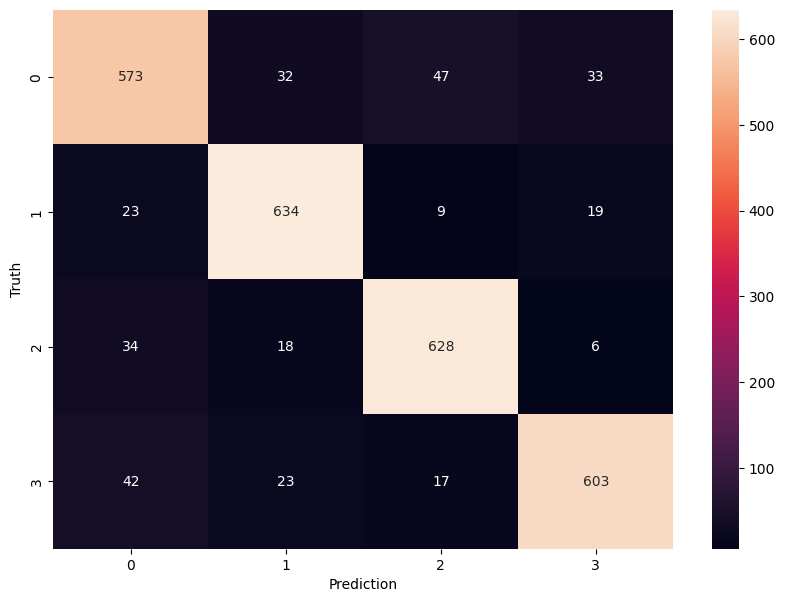

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot = True , fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## SVM

In [47]:
from sklearn.svm import LinearSVC
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
    ('model', LinearSVC(C=1.0))
])


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       685
           1       0.93      0.89      0.91       685
           2       0.83      0.92      0.87       686
           3       0.92      0.83      0.87       685

    accuracy                           0.87      2741
   macro avg       0.87      0.87      0.87      2741
weighted avg       0.87      0.87      0.87      2741



## Logistic regression

In [49]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
    ('model', LogisticRegression(max_iter=1000, C=1.0))
])
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       685
           1       0.93      0.88      0.91       685
           2       0.89      0.90      0.89       686
           3       0.90      0.85      0.87       685

    accuracy                           0.88      2741
   macro avg       0.88      0.88      0.88      2741
weighted avg       0.88      0.88      0.88      2741

